In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import requests
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [2]:
fname = "stringer_orientations.npy"
url = "https://osf.io/ny4ut/download"

if not os.path.isfile(fname):
  try:
    r = requests.get(url)
  except requests.ConnectionError:
    print("!!! Failed to download data !!!")
  else:
    if r.status_code != requests.codes.ok:
      print("!!! Failed to download data !!!")
    else:
      with open(fname, "wb") as fid:
        fid.write(r.content)

In [3]:
dat = np.load('stringer_orientations.npy', allow_pickle=True).item()
print(dat.keys())

dict_keys(['sresp', 'istim', 'stat', 'u_spont', 'v_spont', 'mean_spont', 'std_spont', 'stimtimes', 'frametimes', 'camtimes', 'run', 'info', 'xyz'])


In [4]:
neural_response_data = dat['sresp']
num_neurons = 20
num_stimuli = 20
selected_neurons = neural_response_data[:num_neurons, :num_stimuli]
organized_data = selected_neurons

In [5]:
for stimulus_num in range(num_stimuli):
    print("\n")
    print(f"Stimulus {stimulus_num + 1}:")
    for neuron_num in range(num_neurons):
        print(f"  Neuron {neuron_num + 1}: {organized_data[neuron_num, stimulus_num]}")



Stimulus 1:
  Neuron 1: 53.48326110839844
  Neuron 2: 20.518503189086914
  Neuron 3: 0.0
  Neuron 4: 578.9168090820312
  Neuron 5: 1.836930751800537
  Neuron 6: 568.0250854492188
  Neuron 7: 208.3854522705078
  Neuron 8: 10.627717971801758
  Neuron 9: 0.0
  Neuron 10: 914.9859008789062
  Neuron 11: 3.5850555896759033
  Neuron 12: 0.0
  Neuron 13: 1.3662985563278198
  Neuron 14: 261.6014404296875
  Neuron 15: 58.7748908996582
  Neuron 16: 356.761962890625
  Neuron 17: 0.0
  Neuron 18: 0.0
  Neuron 19: 84.98873138427734
  Neuron 20: 52.115509033203125


Stimulus 2:
  Neuron 1: 63.134761810302734
  Neuron 2: 2.3799569606781006
  Neuron 3: 0.0
  Neuron 4: 14.064929008483887
  Neuron 5: 6.834842205047607
  Neuron 6: 661.8786010742188
  Neuron 7: 85.330322265625
  Neuron 8: 0.0
  Neuron 9: 0.0
  Neuron 10: 238.62693786621094
  Neuron 11: 0.0
  Neuron 12: 11.307642936706543
  Neuron 13: 0.0
  Neuron 14: 122.5224838256836
  Neuron 15: 0.0
  Neuron 16: 0.0
  Neuron 17: 45.941680908203125
  Ne

<ipython-input-102-ec61cd55c81b>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')(xc)


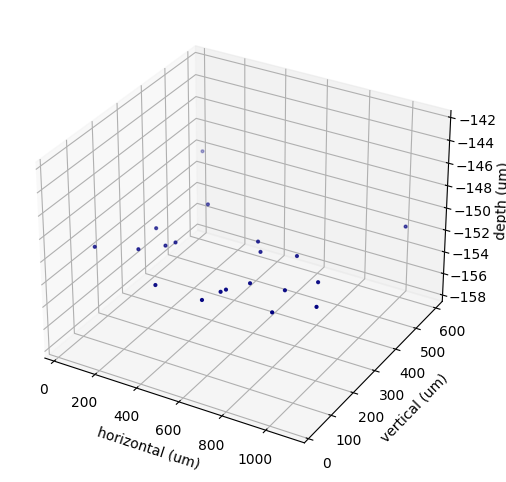

In [102]:
x, y, z = dat['xyz']

# Get positions of the first 20 neurons
num_neurons = 20
x_first_20 = x[:num_neurons]
y_first_20 = y[:num_neurons]
z_first_20 = z[:num_neurons]

zunq, iunq = np.unique(z_first_20, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_first_20[::-1], y_first_20[::-1], z_first_20[::-1], 'o', s=4, c=cmap[iunq])
ax.set(xlabel='horizontal (um)', ylabel='vertical (um)', zlabel='depth (um)')
plt.show()


<ipython-input-103-1d8e17576909>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet')(xc)
<ipython-input-103-1d8e17576909>:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x_first_20[neuron_idx], y_first_20[neuron_idx], z_first_20[neuron_idx], 'o', s=50, c=cmap[iunq[neuron_idx]])


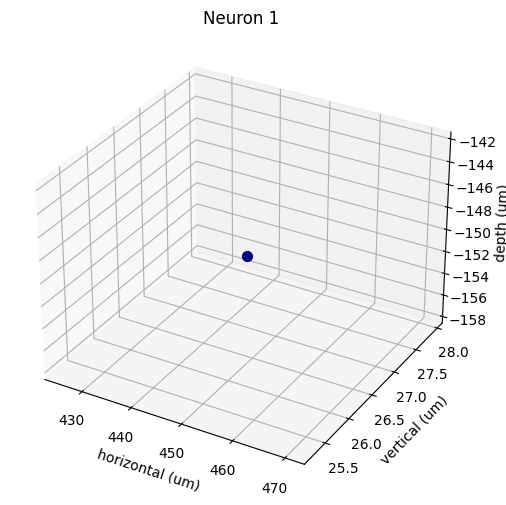

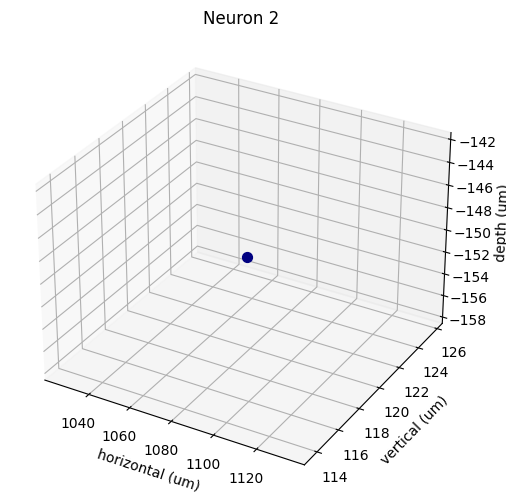

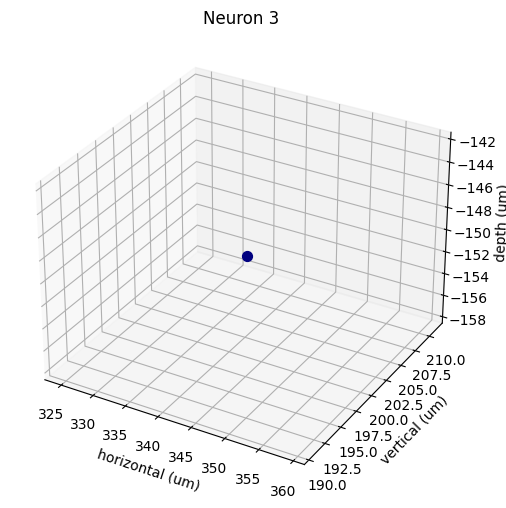

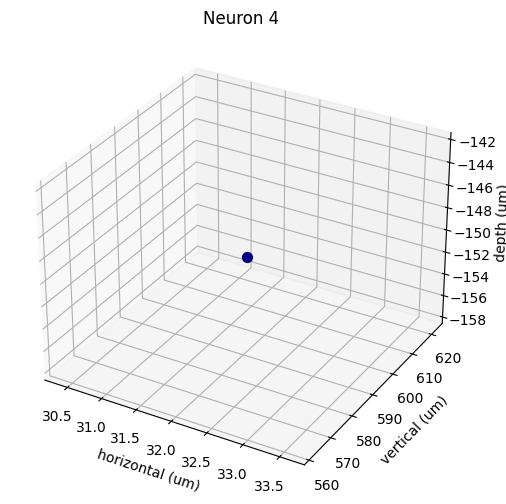

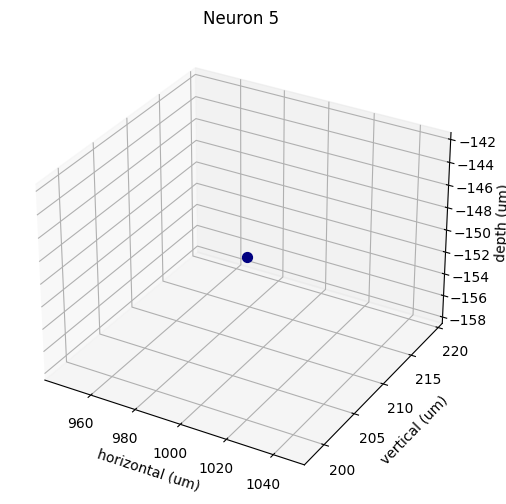

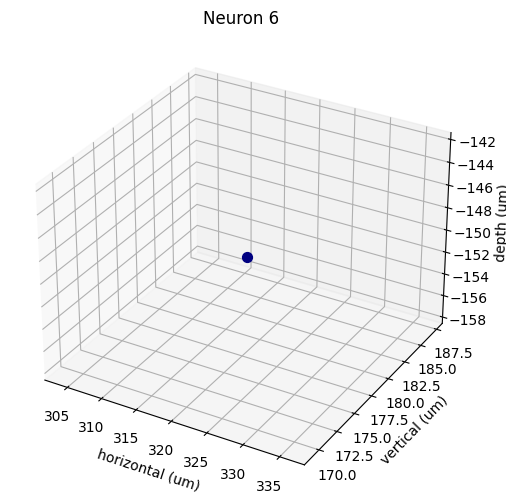

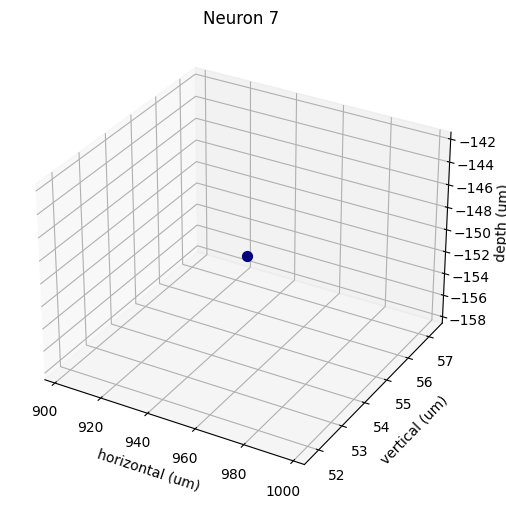

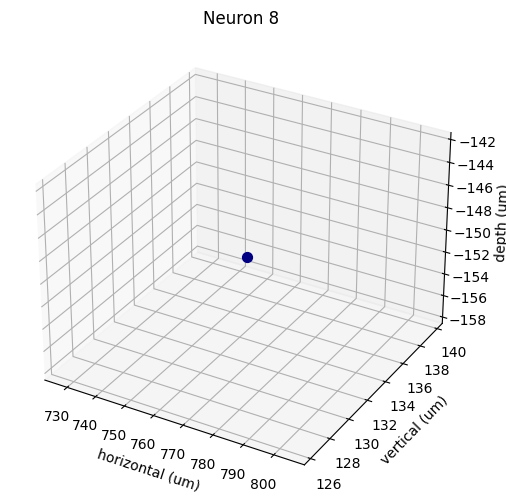

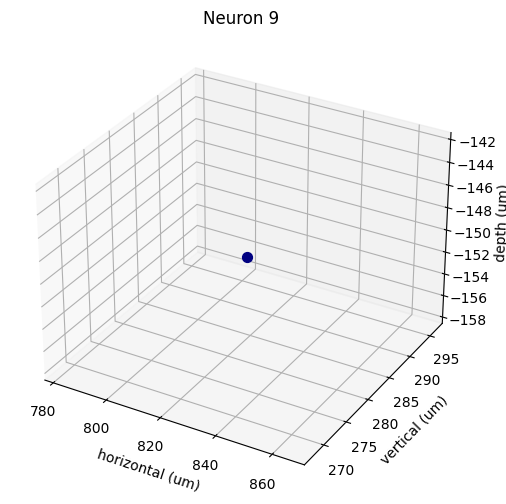

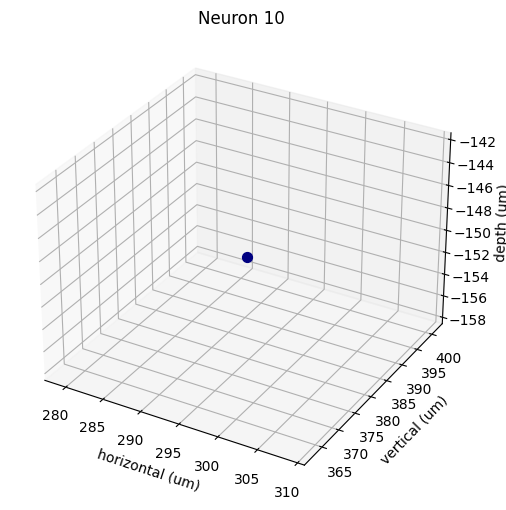

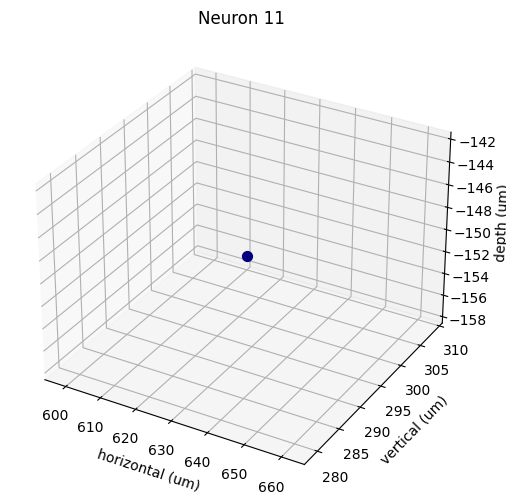

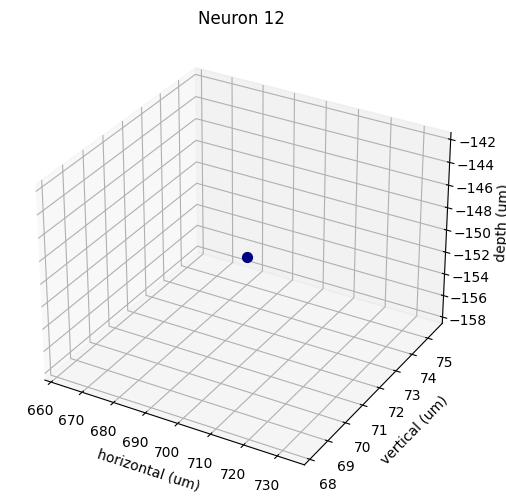

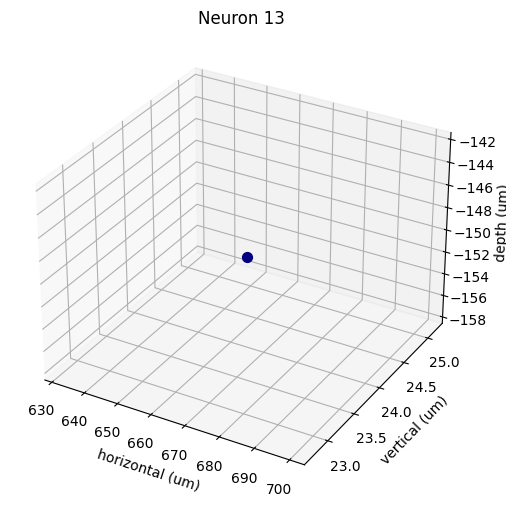

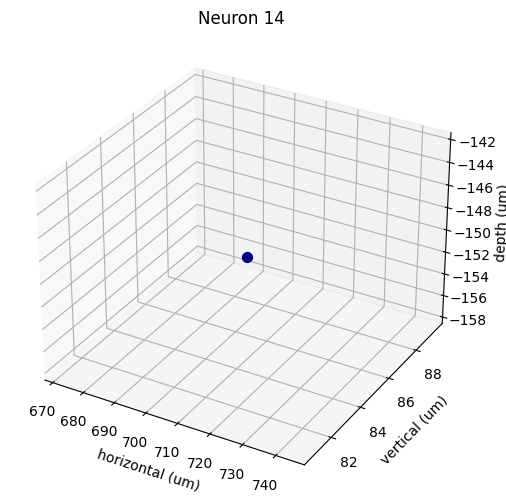

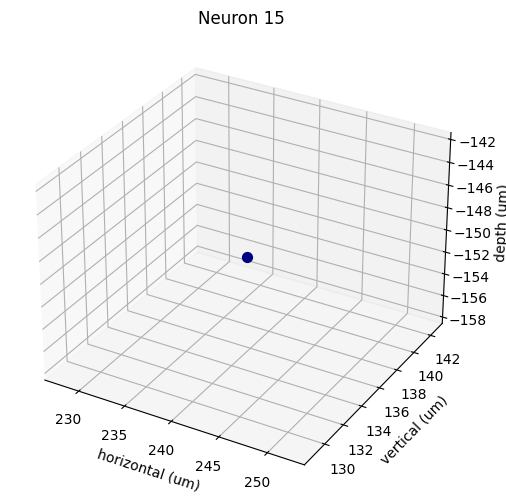

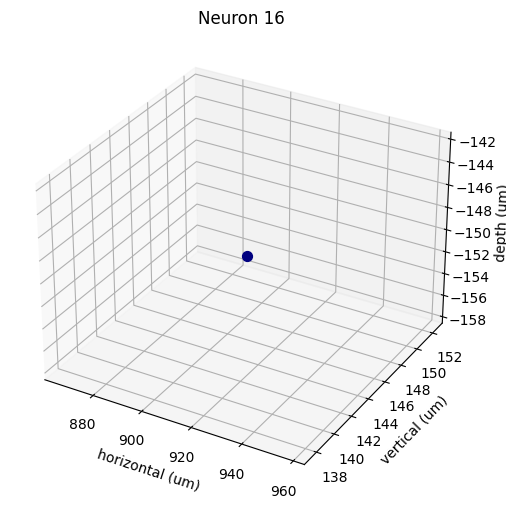

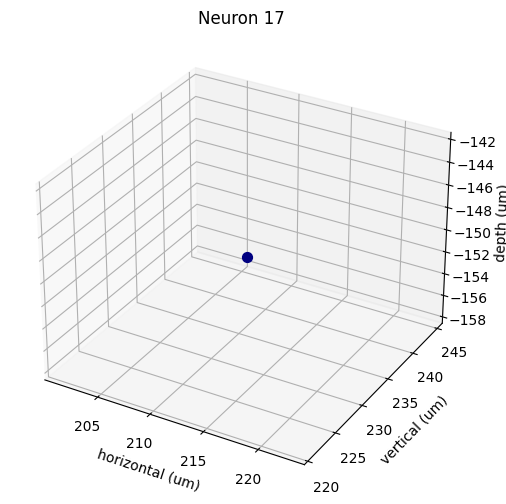

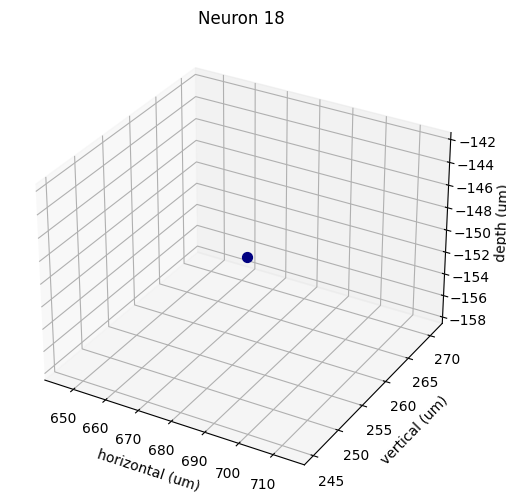

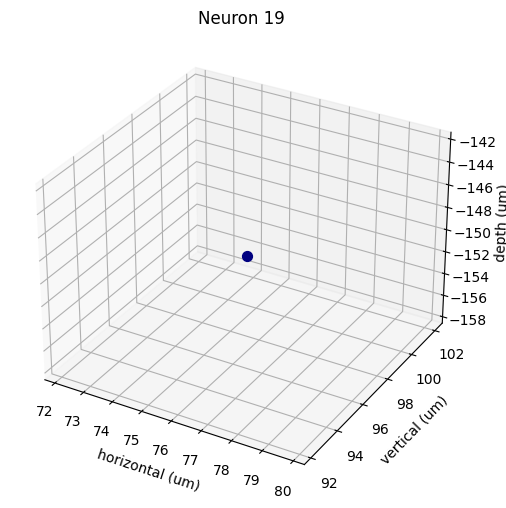

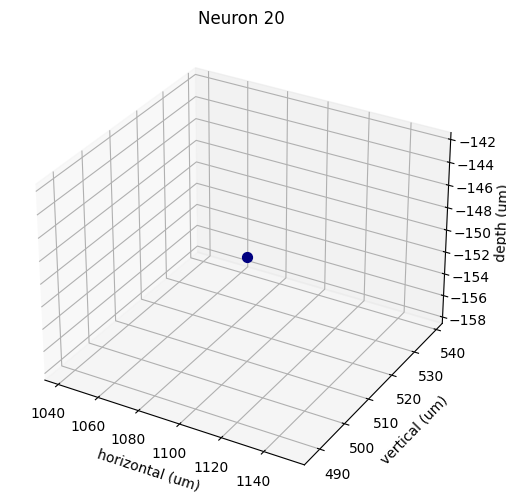

In [103]:
x, y, z = dat['xyz']

# Get positions of the first 20 neurons
num_neurons = 20
x_first_20 = x[:num_neurons]
y_first_20 = y[:num_neurons]
z_first_20 = z[:num_neurons]

zunq, iunq = np.unique(z_first_20, return_inverse=True)
xc = np.linspace(0.0, 1.0, len(zunq))
cmap = cm.get_cmap('jet')(xc)

# Plot separate 3D scatter plot for each neuron
for neuron_idx in range(num_neurons):
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x_first_20[neuron_idx], y_first_20[neuron_idx], z_first_20[neuron_idx], 'o', s=50, c=cmap[iunq[neuron_idx]])
    ax.set(xlabel='horizontal (um)', ylabel='vertical (um)', zlabel='depth (um)')
    ax.set_title(f'Neuron {neuron_idx + 1}')
    plt.show()

In [104]:
neural_response_data = dat['sresp']
num_neurons = 20
num_stimuli = 20
selected_neurons = neural_response_data[:num_neurons, :num_stimuli]

# Calculate the average response for each neuron across all the trials for the first 20 stimuli
average_response_across_trials = np.mean(selected_neurons, axis=1)

for neuron_num in range(num_neurons):
    print(f"\nNeuron {neuron_num + 1} - Average Response: {average_response_across_trials[neuron_num]}")



Neuron 1 - Average Response: 41.01725337356329

Neuron 2 - Average Response: 6.719307562708854

Neuron 3 - Average Response: 5.514338739588856

Neuron 4 - Average Response: 71.0023717880249

Neuron 5 - Average Response: 4.0949998021125795

Neuron 6 - Average Response: 165.0653691291809

Neuron 7 - Average Response: 40.511168205738066

Neuron 8 - Average Response: 7.567682250589132

Neuron 9 - Average Response: 75.84684729576111

Neuron 10 - Average Response: 81.26069375276566

Neuron 11 - Average Response: 4.205762827396393

Neuron 12 - Average Response: 3.15450541973114

Neuron 13 - Average Response: 1.3377032697200775

Neuron 14 - Average Response: 41.66139545440674

Neuron 15 - Average Response: 24.38357820510864

Neuron 16 - Average Response: 20.0573270380497

Neuron 17 - Average Response: 25.083136266469957

Neuron 18 - Average Response: 21.276719707250596

Neuron 19 - Average Response: 17.24164315983653

Neuron 20 - Average Response: 32.06233434677124


In [105]:
neural_response_data = dat['sresp']
num_neurons = 20
num_stimuli = 20
selected_neurons = neural_response_data[:num_neurons, :num_stimuli]

for stimulus_num in range(num_stimuli):
    print("\n")
    print(f"Stimulus {stimulus_num + 1}:")
    for neuron_num in range(num_neurons):
        neuron_response = selected_neurons[neuron_num, stimulus_num]
        average_response = np.mean(neuron_response)  # Calculate average response across all trials
        print(f"  Neuron {neuron_num + 1} - Average Response: {average_response:.2f}")



Stimulus 1:
  Neuron 1 - Average Response: 53.48
  Neuron 2 - Average Response: 20.52
  Neuron 3 - Average Response: 0.00
  Neuron 4 - Average Response: 578.92
  Neuron 5 - Average Response: 1.84
  Neuron 6 - Average Response: 568.03
  Neuron 7 - Average Response: 208.39
  Neuron 8 - Average Response: 10.63
  Neuron 9 - Average Response: 0.00
  Neuron 10 - Average Response: 914.99
  Neuron 11 - Average Response: 3.59
  Neuron 12 - Average Response: 0.00
  Neuron 13 - Average Response: 1.37
  Neuron 14 - Average Response: 261.60
  Neuron 15 - Average Response: 58.77
  Neuron 16 - Average Response: 356.76
  Neuron 17 - Average Response: 0.00
  Neuron 18 - Average Response: 0.00
  Neuron 19 - Average Response: 84.99
  Neuron 20 - Average Response: 52.12


Stimulus 2:
  Neuron 1 - Average Response: 63.13
  Neuron 2 - Average Response: 2.38
  Neuron 3 - Average Response: 0.00
  Neuron 4 - Average Response: 14.06
  Neuron 5 - Average Response: 6.83
  Neuron 6 - Average Response: 661.88
  N

In [106]:
from scipy.stats import norm

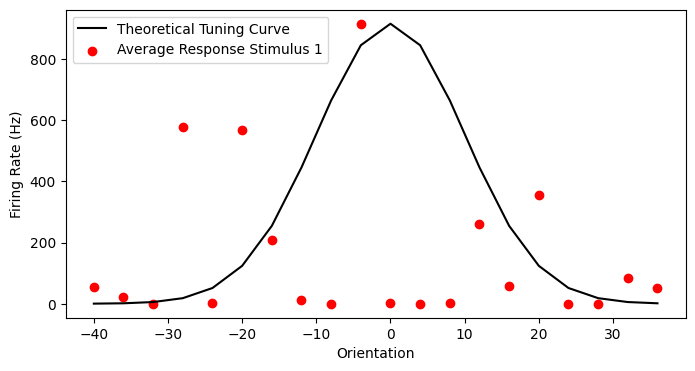

In [110]:

Orientation = np.arange(-40, 40, 4)  # Reduce the step size to match the number of average responses
Max_Firing = 914.99  # Adjusted to match the range of average responses
Min_Firing = 0.00  # Adjusted to match the range of average responses
Variance = 10
Preferred_Direction = 0
tuning_curve_theoretical = norm.pdf(Orientation, Preferred_Direction, Variance)
tuning_curve_theoretical = tuning_curve_theoretical / max(tuning_curve_theoretical)
tuning_curve_theoretical = (Max_Firing - Min_Firing) * tuning_curve_theoretical + Min_Firing

# Neuron average responses for Stimulus 1
average_responses_stimulus1 = [53.48, 20.52, 0.00, 578.92, 1.84, 568.03, 208.39, 10.63, 0.00, 914.99,
                              3.59, 0.00, 1.37, 261.60, 58.77, 356.76, 0.00, 0.00, 84.99, 52.12]

# Plot the theoretical tuning curve
fig = plt.figure(figsize=(8, 4))
plt.plot(Orientation, tuning_curve_theoretical, '-', color='black', label='Theoretical Tuning Curve')

# Plot the average responses for Stimulus 1 on top of the theoretical curve
plt.scatter(Orientation, average_responses_stimulus1, color='red', label='Average Response Stimulus 1')

plt.xlabel('Orientation')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.show()


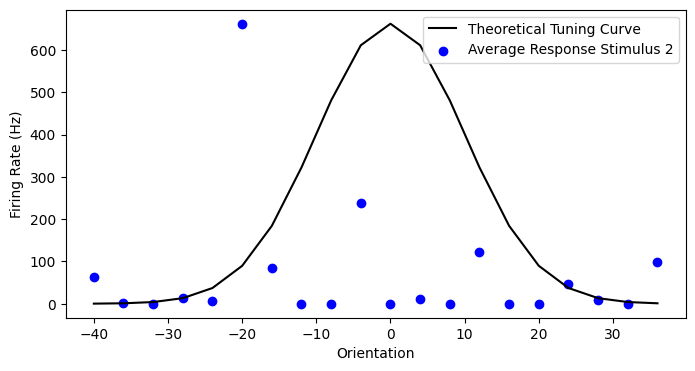

In [111]:
# Given data
Orientation = np.arange(-40, 40, 4)  # Reduce the step size to match the number of average responses
Max_Firing = 661.88  # Adjusted to match the range of average responses for Stimulus 2
Min_Firing = 0.00  # Adjusted to match the range of average responses for Stimulus 2
Variance = 10
Preferred_Direction = 0
tuning_curve_theoretical = norm.pdf(Orientation, Preferred_Direction, Variance)
tuning_curve_theoretical = tuning_curve_theoretical / max(tuning_curve_theoretical)
tuning_curve_theoretical = (Max_Firing - Min_Firing) * tuning_curve_theoretical + Min_Firing

# Neuron average responses for Stimulus 2
average_responses_stimulus2 = [63.13, 2.38, 0.00, 14.06, 6.83, 661.88, 85.33, 0.00, 0.00, 238.63,
                              0.00, 11.31, 0.00, 122.52, 0.00, 0.00, 45.94, 7.88, 0.00, 98.91]

# Plot the theoretical tuning curve
fig = plt.figure(figsize=(8, 4))
plt.plot(Orientation, tuning_curve_theoretical, '-', color='black', label='Theoretical Tuning Curve')

# Plot the average responses for Stimulus 2 on top of the theoretical curve
plt.scatter(Orientation, average_responses_stimulus2, color='blue', label='Average Response Stimulus 2')

plt.xlabel('Orientation')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.show()

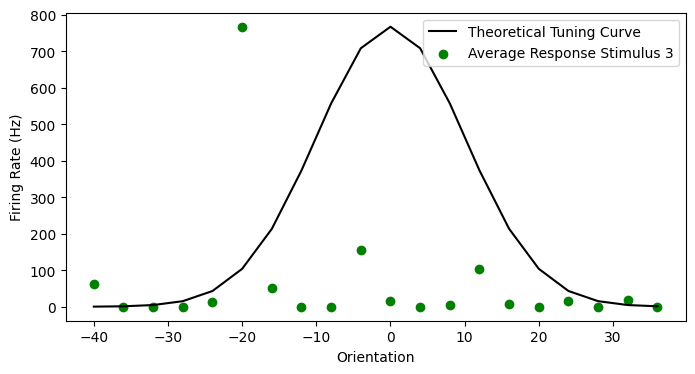

In [112]:
# Given data
Orientation = np.arange(-40, 40, 4)  # Reduce the step size to match the number of average responses
Max_Firing = 767.10  # Adjusted to match the range of average responses for Stimulus 3
Min_Firing = 0.00  # Adjusted to match the range of average responses for Stimulus 3
Variance = 10
Preferred_Direction = 0
tuning_curve_theoretical = norm.pdf(Orientation, Preferred_Direction, Variance)
tuning_curve_theoretical = tuning_curve_theoretical / max(tuning_curve_theoretical)
tuning_curve_theoretical = (Max_Firing - Min_Firing) * tuning_curve_theoretical + Min_Firing

# Neuron average responses for Stimulus 3
average_responses_stimulus3 = [62.43, 0.00, 0.00, 0.00, 12.26, 767.10, 52.51, 0.00, 0.00, 155.80,
                              14.93, 0.00, 3.36, 101.99, 7.59, 0.00, 16.01, 0.00, 18.20, 0.00]

# Plot the theoretical tuning curve
fig = plt.figure(figsize=(8, 4))
plt.plot(Orientation, tuning_curve_theoretical, '-', color='black', label='Theoretical Tuning Curve')

# Plot the average responses for Stimulus 3 on top of the theoretical curve
plt.scatter(Orientation, average_responses_stimulus3, color='green', label='Average Response Stimulus 3')

plt.xlabel('Orientation')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.show()

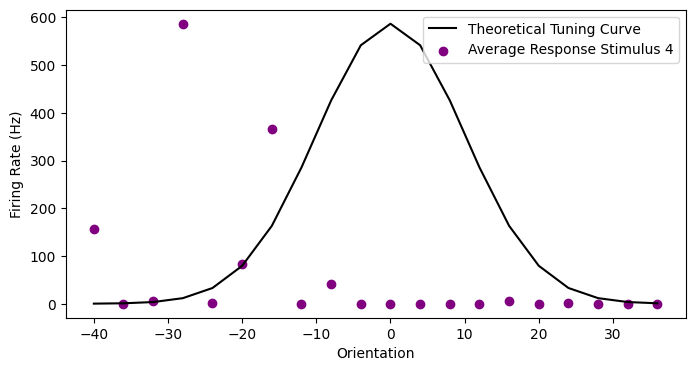

In [113]:
# Given data
Orientation = np.arange(-40, 40, 4)  # Reduce the step size to match the number of average responses
Max_Firing = 586.90  # Adjusted to match the range of average responses for Stimulus 4
Min_Firing = 0.00  # Adjusted to match the range of average responses for Stimulus 4
Variance = 10
Preferred_Direction = 0
tuning_curve_theoretical = norm.pdf(Orientation, Preferred_Direction, Variance)
tuning_curve_theoretical = tuning_curve_theoretical / max(tuning_curve_theoretical)
tuning_curve_theoretical = (Max_Firing - Min_Firing) * tuning_curve_theoretical + Min_Firing

# Neuron average responses for Stimulus 4
average_responses_stimulus4 = [156.09, 0.00, 6.53, 586.90, 2.15, 82.77, 365.86, 0.00, 41.98, 0.00,
                              0.00, 0.00, 0.00, 0.00, 4.72, 0.00, 1.51, 0.00, 0.00, 0.00]

# Plot the theoretical tuning curve
fig = plt.figure(figsize=(8, 4))
plt.plot(Orientation, tuning_curve_theoretical, '-', color='black', label='Theoretical Tuning Curve')

# Plot the average responses for Stimulus 4 on top of the theoretical curve
plt.scatter(Orientation, average_responses_stimulus4, color='purple', label='Average Response Stimulus 4')

plt.xlabel('Orientation')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.show()

In [116]:
neural_response_data = dat['sresp']
num_neurons = 20
num_stimuli = 20
selected_neurons = neural_response_data[:num_neurons, :num_stimuli]

results = []

for stimulus_num in range(num_stimuli):
    for neuron_num in range(num_neurons):
        neuron_response = selected_neurons[neuron_num, stimulus_num]
        average_response = np.mean(neuron_response)

        results.append({
            "stimulus_number": stimulus_num + 1,
            "neuron_number": neuron_num + 1,
            "average_response": average_response
        })

# Save the DataFrame to a CSV file
df.to_csv("neuron_responses.csv", index=False)

df = pd.DataFrame(results)

print(df)


     stimulus_number  neuron_number  average_response
0                  1              1         53.483261
1                  1              2         20.518503
2                  1              3          0.000000
3                  1              4        578.916809
4                  1              5          1.836931
..               ...            ...               ...
395               20             16          0.000000
396               20             17         22.642731
397               20             18         96.774963
398               20             19          9.735809
399               20             20          7.248991

[400 rows x 3 columns]


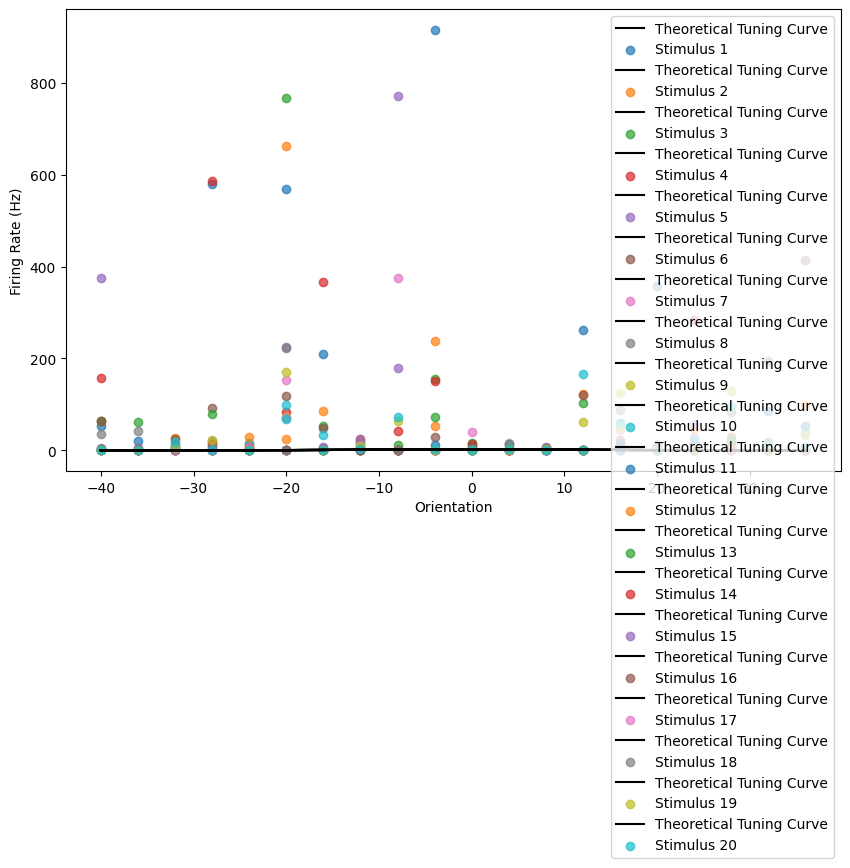

In [118]:
Orientation = np.arange(-40, 40, 4)
Variance = 10
Preferred_Direction = 0
tuning_curve_theoretical = norm.pdf(Orientation, Preferred_Direction, Variance)
tuning_curve_theoretical = tuning_curve_theoretical / max(tuning_curve_theoretical)

# Load the data from the CSV file
data_path = 'neuron_responses.csv'
data = pd.read_csv(data_path)

# Group the data by 'stimulus_number'
grouped_data = data.groupby('stimulus_number')

# Plot the tuning curves for each stimulus
plt.figure(figsize=(10, 6))
for stimulus_num, group in grouped_data:
    average_responses_stimulus = group['average_response'].values
    plt.plot(Orientation, tuning_curve_theoretical, '-', color='black', label='Theoretical Tuning Curve')
    plt.scatter(Orientation, average_responses_stimulus, label=f'Stimulus {stimulus_num}', alpha=0.7)

plt.xlabel('Orientation')
plt.ylabel('Firing Rate (Hz)')
plt.legend()
plt.show()

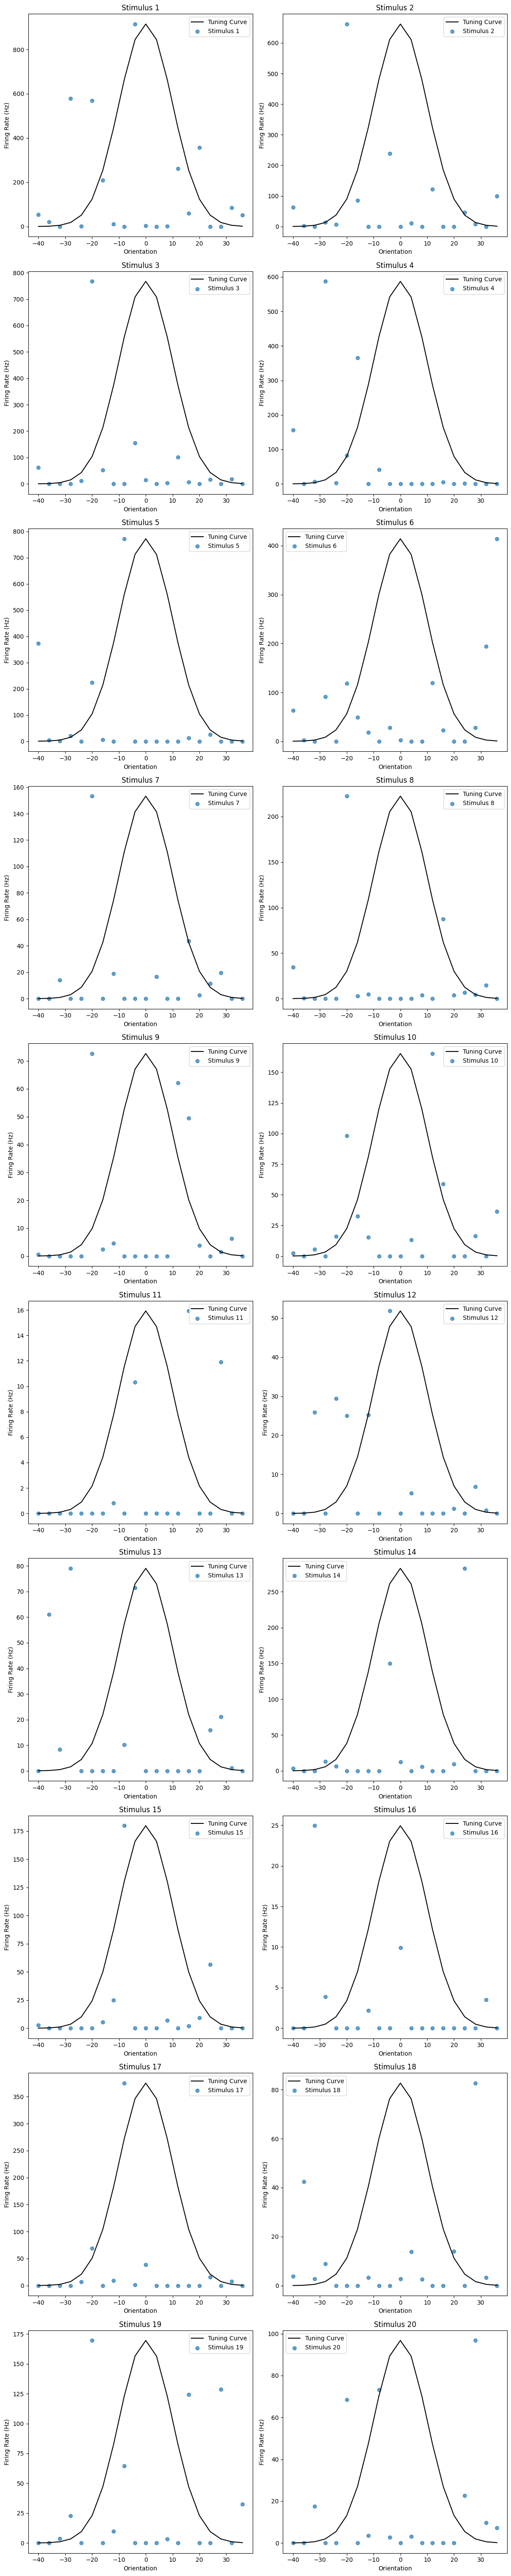

In [120]:
# Given data for the tuning curve
Orientation = np.arange(-40, 40, 4)
Variance = 10
Preferred_Direction = 0
tuning_curve_theoretical = norm.pdf(Orientation, Preferred_Direction, Variance)
tuning_curve_theoretical = tuning_curve_theoretical / max(tuning_curve_theoretical)

# Load the data from the CSV file
data_path = 'neuron_responses.csv'
data = pd.read_csv(data_path)

# Group the data by 'stimulus_number'
grouped_data = data.groupby('stimulus_number')

num_stimuli = len(grouped_data)
num_neurons = 20
num_rows = int(np.ceil(num_stimuli / 2))
num_cols = min(num_stimuli, 2)

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 6 * num_rows))
axs = axs.ravel()

# Plot the tuning curves and average responses for each stimulus
for i, (stimulus_num, group) in enumerate(grouped_data):
    average_responses_stimulus = group['average_response'].values
    max_firing = max(average_responses_stimulus)
    min_firing = min(average_responses_stimulus)
    tuning_curve_stimulus = (max_firing - min_firing) * tuning_curve_theoretical + min_firing

    axs[i].plot(Orientation, tuning_curve_stimulus, '-', color='black', label='Tuning Curve')
    axs[i].scatter(Orientation, average_responses_stimulus, label=f'Stimulus {stimulus_num}', alpha=0.7)
    axs[i].set_xlabel('Orientation')
    axs[i].set_ylabel('Firing Rate (Hz)')
    axs[i].set_title(f'Stimulus {stimulus_num}')
    axs[i].legend()

# Remove any unused subplots
for i in range(num_stimuli, num_rows * num_cols):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

Stimulus 1, Neuron 1 - Average Response: 53.48
Stimulus 1, Neuron 2 - Average Response: 20.52
Stimulus 1, Neuron 3 - Average Response: 0.00
Stimulus 1, Neuron 4 - Average Response: 578.92
Stimulus 1, Neuron 5 - Average Response: 1.84
Stimulus 1, Neuron 6 - Average Response: 568.03
Stimulus 1, Neuron 7 - Average Response: 208.39
Stimulus 1, Neuron 8 - Average Response: 10.63
Stimulus 1, Neuron 9 - Average Response: 0.00
Stimulus 1, Neuron 10 - Average Response: 914.99
Stimulus 1, Neuron 11 - Average Response: 3.59
Stimulus 1, Neuron 12 - Average Response: 0.00
Stimulus 1, Neuron 13 - Average Response: 1.37
Stimulus 1, Neuron 14 - Average Response: 261.60
Stimulus 1, Neuron 15 - Average Response: 58.77
Stimulus 1, Neuron 16 - Average Response: 356.76
Stimulus 1, Neuron 17 - Average Response: 0.00
Stimulus 1, Neuron 18 - Average Response: 0.00
Stimulus 1, Neuron 19 - Average Response: 84.99
Stimulus 1, Neuron 20 - Average Response: 52.12
Stimulus 2, Neuron 1 - Average Response: 63.13
Stim

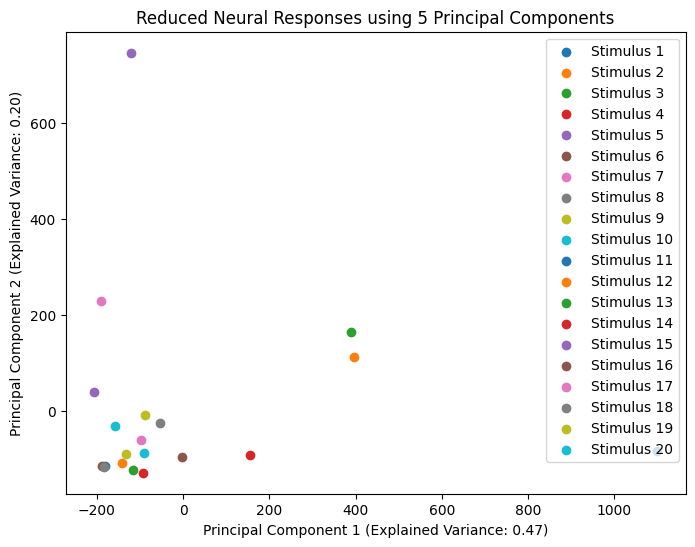

In [124]:
# Given data for the neural response
neural_response_data = dat['sresp']
num_neurons = 20
num_stimuli = 20
selected_neurons = neural_response_data[:num_neurons, :num_stimuli]

# Calculate average neural responses for the first 20 neurons individually for each stimulus
average_responses = np.zeros((num_neurons, num_stimuli))
for stimulus_num in range(num_stimuli):
    for neuron_num in range(num_neurons):
        neuron_response = selected_neurons[neuron_num, stimulus_num]
        average_response = np.mean(neuron_response)  # Calculate average response across all trials
        average_responses[neuron_num, stimulus_num] = average_response
        print(f"Stimulus {stimulus_num + 1}, Neuron {neuron_num + 1} - Average Response: {average_response:.2f}")

# Apply PCA to determine the optimal number of components based on cumulative explained variance
pca = PCA()
pca.fit(average_responses.T)

# Determine the number of components to retain based on cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_to_retain = np.argmax(cumulative_explained_variance >= 0.95) + 1  # Retain 95% of the variance

# Apply PCA again with the optimal number of components
pca = PCA(n_components=num_components_to_retain)
reduced_responses = pca.fit_transform(average_responses.T)  # Transpose the data for PCA

# Plot the reduced responses
plt.figure(figsize=(8, 6))
for i, stimulus_num in enumerate(range(num_stimuli)):
    plt.scatter(reduced_responses[i, 0], reduced_responses[i, 1], label=f'Stimulus {stimulus_num + 1}')

plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.title(f'Reduced Neural Responses using {num_components_to_retain} Principal Components')
plt.legend()
plt.show()


Stimulus 1, Neuron 1 - Average Response: 53.48
Stimulus 1, Neuron 2 - Average Response: 20.52
Stimulus 1, Neuron 3 - Average Response: 0.00
Stimulus 1, Neuron 4 - Average Response: 578.92
Stimulus 1, Neuron 5 - Average Response: 1.84
Stimulus 1, Neuron 6 - Average Response: 568.03
Stimulus 1, Neuron 7 - Average Response: 208.39
Stimulus 1, Neuron 8 - Average Response: 10.63
Stimulus 1, Neuron 9 - Average Response: 0.00
Stimulus 1, Neuron 10 - Average Response: 914.99
Stimulus 1, Neuron 11 - Average Response: 3.59
Stimulus 1, Neuron 12 - Average Response: 0.00
Stimulus 1, Neuron 13 - Average Response: 1.37
Stimulus 1, Neuron 14 - Average Response: 261.60
Stimulus 1, Neuron 15 - Average Response: 58.77
Stimulus 1, Neuron 16 - Average Response: 356.76
Stimulus 1, Neuron 17 - Average Response: 0.00
Stimulus 1, Neuron 18 - Average Response: 0.00
Stimulus 1, Neuron 19 - Average Response: 84.99
Stimulus 1, Neuron 20 - Average Response: 52.12
Stimulus 2, Neuron 1 - Average Response: 63.13
Stim

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


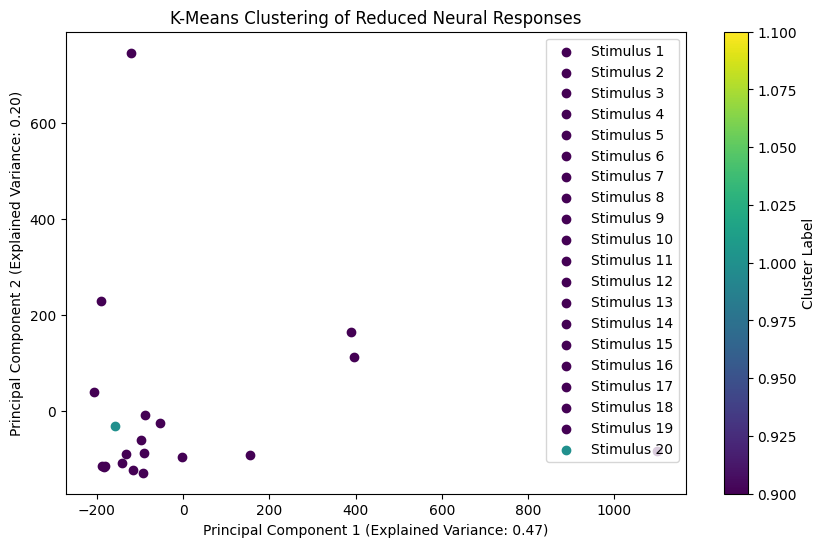

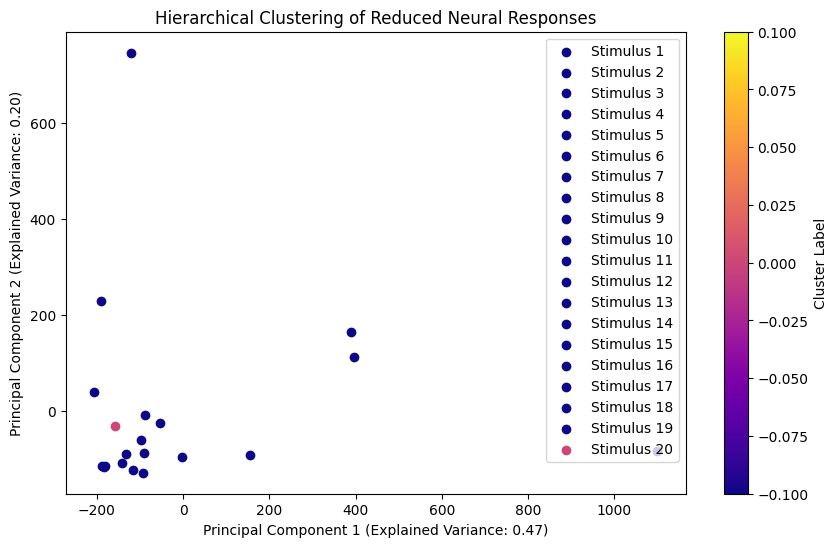

In [127]:
neural_response_data = dat['sresp']
num_neurons = 20
num_stimuli = 20
selected_neurons = neural_response_data[:num_neurons, :num_stimuli]

# Calculate average neural responses for the first 20 neurons individually for each stimulus
average_responses = np.zeros((num_neurons, num_stimuli))
for stimulus_num in range(num_stimuli):
    for neuron_num in range(num_neurons):
        neuron_response = selected_neurons[neuron_num, stimulus_num]
        average_response = np.mean(neuron_response)
        average_responses[neuron_num, stimulus_num] = average_response
        print(f"Stimulus {stimulus_num + 1}, Neuron {neuron_num + 1} - Average Response: {average_response:.2f}")

# Apply PCA to determine the optimal number of components based on cumulative explained variance
pca = PCA()
pca.fit(average_responses.T)

# Determine the number of components to retain based on cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_to_retain = np.argmax(cumulative_explained_variance >= 0.95) + 1  # Retain 95% of the variance

# Apply PCA again with the optimal number of components
pca = PCA(n_components=num_components_to_retain)
reduced_responses = pca.fit_transform(average_responses.T)  # Transpose the data for PCA

# Perform k-means clustering on the reduced responses with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(reduced_responses)

# Perform hierarchical clustering on the reduced responses with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(reduced_responses)

# Plot the clustered neurons based on k-means clustering
plt.figure(figsize=(10, 6))
for i, stimulus_num in enumerate(range(num_stimuli)):
    plt.scatter(reduced_responses[i, 0], reduced_responses[i, 1], c=kmeans_labels[i], cmap='viridis', label=f'Stimulus {stimulus_num + 1}')

plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.title(f'K-Means Clustering of Reduced Neural Responses')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()

# Plot the clustered neurons based on hierarchical clustering
plt.figure(figsize=(10, 6))
for i, stimulus_num in enumerate(range(num_stimuli)):
    plt.scatter(reduced_responses[i, 0], reduced_responses[i, 1], c=hierarchical_labels[i], cmap='plasma', label=f'Stimulus {stimulus_num + 1}')

plt.xlabel(f'Principal Component 1 (Explained Variance: {pca.explained_variance_ratio_[0]:.2f})')
plt.ylabel(f'Principal Component 2 (Explained Variance: {pca.explained_variance_ratio_[1]:.2f})')
plt.title(f'Hierarchical Clustering of Reduced Neural Responses')
plt.colorbar(label='Cluster Label')
plt.legend()
plt.show()


Stimulus 1, Neuron 1 - Average Response: 53.48
Stimulus 1, Neuron 2 - Average Response: 20.52
Stimulus 1, Neuron 3 - Average Response: 0.00
Stimulus 1, Neuron 4 - Average Response: 578.92
Stimulus 1, Neuron 5 - Average Response: 1.84
Stimulus 1, Neuron 6 - Average Response: 568.03
Stimulus 1, Neuron 7 - Average Response: 208.39
Stimulus 1, Neuron 8 - Average Response: 10.63
Stimulus 1, Neuron 9 - Average Response: 0.00
Stimulus 1, Neuron 10 - Average Response: 914.99
Stimulus 1, Neuron 11 - Average Response: 3.59
Stimulus 1, Neuron 12 - Average Response: 0.00
Stimulus 1, Neuron 13 - Average Response: 1.37
Stimulus 1, Neuron 14 - Average Response: 261.60
Stimulus 1, Neuron 15 - Average Response: 58.77
Stimulus 1, Neuron 16 - Average Response: 356.76
Stimulus 1, Neuron 17 - Average Response: 0.00
Stimulus 1, Neuron 18 - Average Response: 0.00
Stimulus 1, Neuron 19 - Average Response: 84.99
Stimulus 1, Neuron 20 - Average Response: 52.12
Stimulus 2, Neuron 1 - Average Response: 63.13
Stim

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-130-322b7350e71a>:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=None, cmap='viridis'), label='Cluster Label')


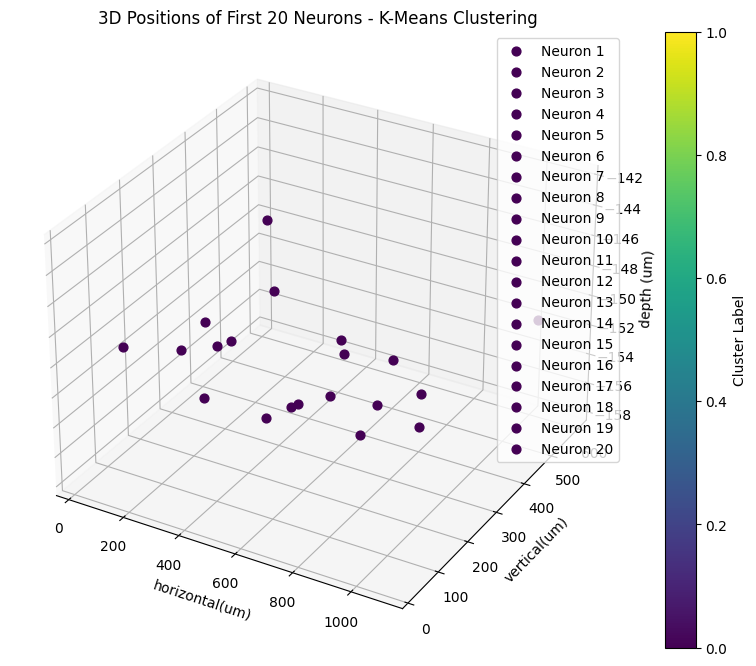

<ipython-input-130-322b7350e71a>:67: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(cm.ScalarMappable(norm=None, cmap='plasma'), label='Cluster Label')


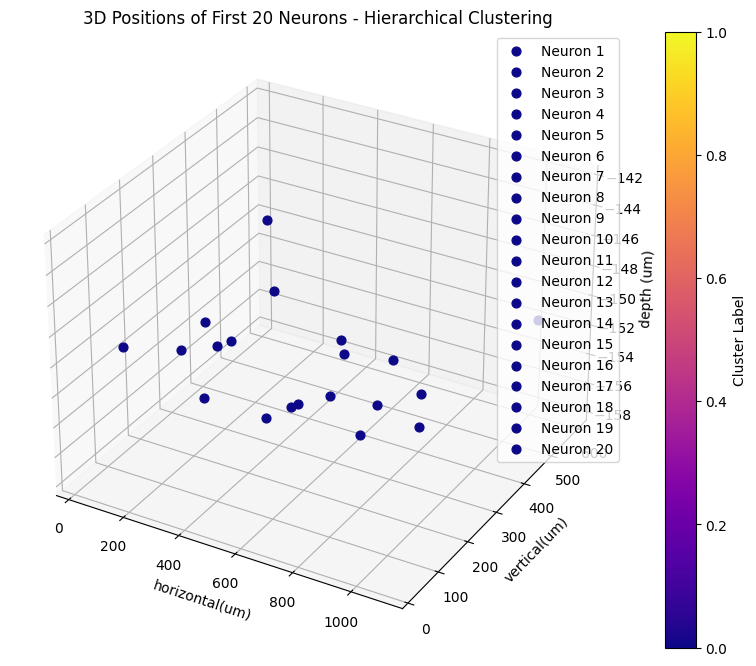

In [130]:
# Given data for the neural response
neural_response_data = dat['sresp']
num_neurons = 20
num_stimuli = 20
selected_neurons = neural_response_data[:num_neurons, :num_stimuli]

# Calculate average neural responses for the first 20 neurons individually for each stimulus
average_responses = np.zeros((num_neurons, num_stimuli))
for stimulus_num in range(num_stimuli):
    for neuron_num in range(num_neurons):
        neuron_response = selected_neurons[neuron_num, stimulus_num]
        average_response = np.mean(neuron_response)  # Calculate average response across all trials
        average_responses[neuron_num, stimulus_num] = average_response
        print(f"Stimulus {stimulus_num + 1}, Neuron {neuron_num + 1} - Average Response: {average_response:.2f}")

# Apply PCA to determine the optimal number of components based on cumulative explained variance
pca = PCA()
pca.fit(average_responses.T)

# Determine the number of components to retain based on cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
num_components_to_retain = np.argmax(cumulative_explained_variance >= 0.95) + 1  # Retain 95% of the variance

# Apply PCA again with the optimal number of components
pca = PCA(n_components=num_components_to_retain)
reduced_responses = pca.fit_transform(average_responses.T)  # Transpose the data for PCA

# Perform k-means clustering on the reduced responses with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans_labels = kmeans.fit_predict(reduced_responses)

# Perform hierarchical clustering on the reduced responses with 3 clusters
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(reduced_responses)

x, y, z = dat['xyz']

# Plot the 3D positions of the first 20 neurons with colors based on the k-means clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_neurons):
    ax.scatter(x[i], y[i], z[i], s=40, c=kmeans_labels[i], cmap='viridis', label=f'Neuron {i + 1}')

ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
ax.set_title('3D Positions of First 20 Neurons - K-Means Clustering')
plt.colorbar(cm.ScalarMappable(norm=None, cmap='viridis'), label='Cluster Label')
plt.legend()
plt.show()

# Plot the 3D positions of the first 20 neurons with colors based on the hierarchical clustering
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(num_neurons):
    ax.scatter(x[i], y[i], z[i], s=40, c=hierarchical_labels[i], cmap='plasma', label=f'Neuron {i + 1}')

ax.set(xlabel='horizontal(um)', ylabel='vertical(um)', zlabel='depth (um)')
ax.set_title('3D Positions of First 20 Neurons - Hierarchical Clustering')
plt.colorbar(cm.ScalarMappable(norm=None, cmap='plasma'), label='Cluster Label')
plt.legend()
plt.show()
